In [99]:
import pandas as pd
import numpy as np
import csv
import os
import xgboost as xgb
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import mean_squared_error
import optuna
from optuna.samplers import TPESampler, GridSampler, RandomSampler
import math
import timeit
import matplotlib.pyplot as plt

In [2]:
os.getcwd()

'/Users/seanhong/Desktop/Curriculum/Merck Project/Code/qsar_results'

# Import testing datasets

In [26]:
train_list = []
test_list = []
# load both train and test datsets
for n in range(1, 16):
    tr_x_name = 'QSAR_{}_train_x'.format(n)
    tr_y_name = 'QSAR_{}_train_y'.format(n)
    ts_x_name = 'QSAR_{}_test_x'.format(n)
    ts_y_name = 'QSAR_{}_test_y'.format(n)
    tr_x = pd.read_csv("train_data/"+tr_x_name+".csv")
    tr_y = pd.read_csv("train_data/"+tr_y_name+".csv")
    ts_x = pd.read_csv("test_data/"+ts_x_name+".csv")
    ts_y = pd.read_csv("test_data/"+ts_y_name+".csv")    
    train_df = pd.concat([tr_y, tr_x], axis=1)
    test_df = pd.concat([ts_y, ts_x], axis=1)
    train_list.append(train_df)
    test_list.append(test_df)

In [27]:
num_datasets = len(train_list)
print("Number of training datasets:", num_datasets, "\n")
num_datasets = len(test_list)
print("Number of testing datasets:", num_datasets)

Number of training datasets: 15 

Number of testing datasets: 15


In [28]:
size_list = []
for i in range(num_datasets):
    size_list.append(train_list[i].shape)
size_list

[(37241, 9178),
 (8716, 5556),
 (6148, 5026),
 (1815, 4187),
 (3212, 5752),
 (37388, 8624),
 (1569, 4373),
 (9965, 5593),
 (5351, 4602),
 (11151, 5463),
 (6399, 4732),
 (8651, 4992),
 (6105, 5526),
 (4165, 5713),
 (5059, 5283)]

In [29]:
size_list = []
for i in range(num_datasets):
    size_list.append(test_list[i].shape)
size_list

[(12338, 9178),
 (2907, 5556),
 (2045, 5026),
 (598, 4187),
 (1072, 5752),
 (12406, 8624),
 (523, 4373),
 (3335, 5593),
 (1769, 4602),
 (3704, 5463),
 (2093, 4732),
 (2899, 4992),
 (1707, 5526),
 (1382, 5713),
 (1698, 5283)]

# Import the results

In [125]:
# Define the parameter search space
dval = {
    "booster": "gbtree",
    "lambda": 1,
    "alpha": 0,
    "eta": 0.3,
    "subsample": 1,
    "max_depth": 6,
    "min_child_weight": 1,
    "colsample_bytree": 1,
    "colsample_bylevel": 1
}
n_boost = 10
# Fit the model to each dataset
mlist = []
for i in range(num_datasets):
    bst = xgb.cv(dval, dmat_list[i], num_boost_round=n_boost, nfold=3, metrics='rmse', seed=123, shuffle=True)
    mlist.append(bst.iloc[len(bst.index)-1, 2])
def_result["xgb_rmse"] = mlist

In [127]:
def_result.mean()

rf_rmse     1.965172
xgb_rmse    2.156680
dtype: float64

In [58]:
# Default results
def_result = pd.read_csv("def_result.csv")
# Random Forest
rf_gs_result = pd.read_csv("rf_gs_result.csv")
rf_rs_result = pd.read_csv("rf_rs_result.csv")
rf_bo_result = pd.read_csv("rf_bo_result.csv")
rf_n_estimators = pd.read_csv("rf_n_estimators.csv")
rf_bootstrap = pd.read_csv("rf_bootstrap.csv")
rf_max_samples = pd.read_csv("rf_max_samples.csv")
rf_max_features = pd.read_csv("rf_max_features.csv")
rf_min_samples_leaf = pd.read_csv("rf_min_samples_leaf.csv")
# XGBoost
xgb_gs_result = pd.read_csv("xgb_gs_result.csv")
xgb_rs_result = pd.read_csv("xgb_rs_result.csv")
xgb_bo_result = pd.read_csv("xgb_bo_result.csv")
xgb_num_boost_round = pd.read_csv("xgb_num_boost_round.csv")
xgb_eta = pd.read_csv("xgb_eta.csv")
xgb_alpha = pd.read_csv("xgb_alpha.csv")
xgb_lambda = pd.read_csv("xgb_lambda.csv")
xgb_max_depth = pd.read_csv("xgb_max_depth.csv")
xgb_subsample = pd.read_csv("xgb_subsample.csv")
xgb_min_child_weight = pd.read_csv("xgb_min_child_weight.csv")
xgb_colsample_bylevel = pd.read_csv("xgb_colsample_bylevel.csv")
xgb_colsample_bytree = pd.read_csv("xgb_colsample_bytree.csv")

In [138]:
rf_rs_result

,number,value,datetime_start,datetime_complete,duration,params_bootstrap,params_max_features,params_max_samples,params_min_samples_leaf,params_n_estimators,state
0,0,3.384412,2020-08-15 03:16:25.747238,2020-08-15 03:18:03.851910,0 days 00:01:38.104672000,True,0.3,0.4,0.2,200,COMPLETE
1,1,2.951360,2020-08-15 03:18:03.856212,2020-08-15 03:49:53.626464,0 days 00:31:49.770252000,False,auto,NaN,0.2,1000,COMPLETE
2,2,2.628981,2020-08-15 03:49:53.634339,2020-08-15 03:51:53.451311,0 days 00:01:59.816972000,False,auto,NaN,0.1,10,COMPLETE
3,3,3.112454,2020-08-15 03:51:53.455346,2020-08-15 03:53:47.279572,0 days 00:01:53.824226000,False,auto,NaN,0.4,10,COMPLETE
4,4,3.384159,2020-08-15 03:53:47.285120,2020-08-15 03:55:40.840200,0 days 00:01:53.555080000,True,0.1,0.2,0.5,400,COMPLETE
...,...,...,...,...,...,...,...,...,...,...,...
95,95,3.383807,2020-08-15 11:30:03.879336,2020-08-15 11:31:42.233224,0 days 00:01:38.353888000,True,0.8,0.2,0.4,200,COMPLETE
96,96,3.112454,2020-08-15 11:31:42.237246,2020-08-15 11:37:53.011664,0 days 00:06:10.774418000,False,auto,NaN,0.4,300,COMPLETE
97,97,3.384494,2020-08-15 11:37:53.018233,2020-08-15 11:39:47.425960,0 days 00:01:54.407727000,True,0.3,0.2,0.4,600,COMPLETE
98,98,2.579147,2020-08-15 11:39:47.432622,2020-08-15 12:25:36.738571,0 days 00:45:49.305949000,False,0.9,NaN,0.1,900,COMPLETE


In [141]:
# Select first half (50) of rows of rf_rs_result
rf_rs_result = rf_rs_result.iloc[0:50,:]

In [134]:
idx_min = xgb_num_boost_round["value"].idxmin
xgb_num_boost_round.iloc[idx_min,:]

number                                                                       8
value                                                                  1.94421
datetime_start                                      2020-08-10 21:17:40.298985
datetime_complete                                   2020-08-10 22:29:22.517698
duration                                             0 days 01:11:42.218713000
params_num_boost_round                                                     100
system_attrs_grid_id                                                        10
system_attrs_search_space    OrderedDict([('num_boost_round', [1, 10, 20, 3...
state                                                                 COMPLETE
Name: 8, dtype: object

# Evaluation function

In [34]:
def rmse_eval(mod):
    rlist = []
    for i in range(num_datasets):
        num_col = train_list[i].shape[1]
        x = train_list[i].iloc[:,1:num_col]
        y = train_list[i].iloc[:,0:1].values.ravel()
        xtest = test_list[i].iloc[:,1:num_col]
        ytest = test_list[i].iloc[:,0:1].values.ravel()
        mod.fit(x,y)
        pred = mod.predict(xtest)
        rmse = np.sqrt(mean_squared_error(ytest, pred))
        rlist.append(rmse)
    rmse_mean = sum(rlist)/len(rlist)
    return rmse_mean

# Default results

## - Random Forest (min_samples_leaf = 0.1)

In [35]:
dval = {
    'n_estimators': 100, # "num.trees": 500 / "n_estimators": 100
    'criterion': 'mse',
    'bootstrap': True, # replace
    'max_samples': None, # sample.fraction
    'max_features': 'sqrt', ### "mtry": "sqrt" / "max_features": "auto" ###
    'min_samples_leaf': 0.1, # "min.node.size" default: 5 / "min_samples_leaf": 1
    'n_jobs': -1}
mod = RandomForestRegressor(**dval)
rf_rmse_dval = rmse_eval(mod)
print("RMSE of Random Forest using default values: ", rf_rmse_dval)

RMSE of Random Forest using default values:  3.2153414502944813


## - XGBoost

In [36]:
dval = {
    "n_estimators": 10,
    "booster": "gbtree",
    "lambda": 1,
    "alpha": 0,
    "eta": 0.3,
    "subsample": 1,
    "max_depth": 6,
    "min_child_weight": 1,
    "colsample_bytree": 1,
    "colsample_bylevel": 1
}
mod = xgb.XGBRegressor(**dval)
xgb_rmse_dval = rmse_eval(mod)
print("RMSE of XGBoost using default values: ", xgb_rmse_dval)

RMSE of XGBoost using default values:  2.5955414367260357


# Grid Search

## GS - Random Forest

In [40]:
idx_min = rf_gs_result["value"].idxmin
rf_gs_result.iloc[idx_min,:]

number                                                                      56
value                                                                  2.57515
datetime_start                                      2020-08-19 07:16:40.524520
datetime_complete                                   2020-08-19 07:36:45.741477
duration                                             0 days 00:20:05.216957000
params_bootstrap                                                          True
params_max_features                                                       auto
params_max_samples                                                        0.99
params_min_samples_leaf                                                    0.1
params_n_estimators                                                        700
system_attrs_grid_id                                                       148
system_attrs_search_space    OrderedDict([('bootstrap', [False, True]), ('m...
state                                               

In [37]:
dval = {
    'n_estimators': 700, # "num.trees": 500 / "n_estimators": 100
    'criterion': 'mse',
    'bootstrap': True, # replace
    'max_samples': 0.99, # sample.fraction
    'max_features': 'auto', ### "mtry": "sqrt" / "max_features": "auto" ###
    'min_samples_leaf': 0.1, # "min.node.size" default: 5 / "min_samples_leaf": 1
    'n_jobs': -1}
mod = RandomForestRegressor(**dval)
rf_rmse_gs = rmse_eval(mod)
print("RMSE of Random Forest using Grid Search: ", rf_rmse_gs)

RMSE of Random Forest using Grid Search:  2.9469948187159405


## GS - XGBoost

In [41]:
idx_min = xgb_gs_result["value"].idxmin
xgb_gs_result.iloc[idx_min,:]

number                                                                      62
value                                                                  2.03679
datetime_start                                      2020-08-20 05:10:58.278545
datetime_complete                                   2020-08-20 05:19:38.329354
duration                                             0 days 00:08:40.050809000
params_eta                                                                 0.3
params_max_depth                                                            15
params_min_child_weight                                                     16
system_attrs_grid_id                                                        33
system_attrs_search_space    OrderedDict([('eta', [0.1, 0.2, 0.3, 0.4, 0.5,...
state                                                                 COMPLETE
Name: 62, dtype: object

In [38]:
dval = {
    "n_estimators": 10,
    "booster": "gbtree",
    "lambda": 1,
    "alpha": 0,
    "eta": 0.3,
    "subsample": 1,
    "max_depth": 15,
    "min_child_weight": 16,
    "colsample_bytree": 1,
    "colsample_bylevel": 1
}
mod = xgb.XGBRegressor(**dval)
xgb_rmse_gs = rmse_eval(mod)
print("RMSE of XGBoost using Grid Search: ", xgb_rmse_gs)

RMSE of XGBoost using Grid Search:  2.5526594652014514


# Random Search

## RS - Random Forest

In [142]:
idx_min = rf_rs_result["value"].idxmin
rf_rs_result.iloc[idx_min,:]

number                                             31
value                                         2.52189
datetime_start             2020-08-15 05:42:24.029562
datetime_complete          2020-08-15 05:46:22.031993
duration                    0 days 00:03:58.002431000
params_bootstrap                                False
params_max_features                               0.1
params_max_samples                                NaN
params_min_samples_leaf                           0.1
params_n_estimators                               400
state                                        COMPLETE
Name: 31, dtype: object

In [143]:
dval = {
    'n_estimators': 400, # "num.trees": 500 / "n_estimators": 100
    'criterion': 'mse',
    'bootstrap': False, # replace
    'max_features': 0.1, ### "mtry": "sqrt" / "max_features": "auto" ###
    'min_samples_leaf': 0.1, # "min.node.size" default: 5 / "min_samples_leaf": 1
    'n_jobs': -1}
mod = RandomForestRegressor(**dval)
rf_rmse_rs = rmse_eval(mod)
print("RMSE of Random Forest using Random Search: ", rf_rmse_rs)

RMSE of Random Forest using Random Search:  2.8782441989530048


## RS - XGBoost

In [43]:
idx_min = xgb_rs_result["value"].idxmin
xgb_rs_result.iloc[idx_min,:]

number                                              22
value                                          1.95176
datetime_start              2020-08-18 16:29:44.287506
datetime_complete           2020-08-18 16:53:03.435307
duration                     0 days 00:23:19.147801000
params_alpha                                  0.015625
params_colsample_bylevel                           0.6
params_colsample_bytree                            0.9
params_eta                                         0.1
params_lambda                               0.00195312
params_max_depth                                     7
params_min_child_weight                              8
params_num_boost_round                              60
params_subsample                                   0.7
state                                         COMPLETE
Name: 22, dtype: object

In [47]:
dval = {
    "n_estimators": 60,
    "booster": "gbtree",
    "lambda": 0.00195312,
    "alpha": 0,
    "eta": 0.1,
    "subsample": 0.7,
    "max_depth": 7,
    "min_child_weight": 8,
    "colsample_bytree": 0.9,
    "colsample_bylevel": 0.6
}
mod = xgb.XGBRegressor(**dval)
xgb_rmse_rs = rmse_eval(mod)
print("RMSE of XGBoost using Random Search: ", xgb_rmse_rs)

RMSE of XGBoost using Random Search:  2.3937666366201777


# Bayesian Optimization

## BO - Random Forest

In [44]:
idx_min = rf_bo_result["value"].idxmin
rf_bo_result.iloc[idx_min,:]

number                                             21
value                                         2.48504
datetime_start             2020-08-14 20:56:28.528580
datetime_complete          2020-08-14 21:13:08.490926
duration                    0 days 00:16:39.962346000
params_bootstrap                                False
params_max_features                               0.3
params_max_samples                                NaN
params_min_samples_leaf                           0.1
params_n_estimators                               900
state                                        COMPLETE
Name: 21, dtype: object

In [48]:
dval = {
    'n_estimators': 900, # "num.trees": 500 / "n_estimators": 100
    'criterion': 'mse',
    'bootstrap': False, # replace
    'max_features': 0.3, ### "mtry": "sqrt" / "max_features": "auto" ###
    'min_samples_leaf': 0.1, # "min.node.size" default: 5 / "min_samples_leaf": 1
    'n_jobs': -1}
mod = RandomForestRegressor(**dval)
rf_rmse_bo = rmse_eval(mod)
print("RMSE of Random Forest using Bayesian Optimization: ", rf_rmse_bo)

RMSE of Random Forest using Bayesian Optimization:  2.86651010002624


## BO - XGBoost

In [45]:
idx_min = xgb_bo_result["value"].idxmin
xgb_bo_result.iloc[idx_min,:]

number                                              38
value                                          1.90901
datetime_start              2020-08-17 13:09:08.468815
datetime_complete           2020-08-17 14:11:51.776328
duration                     0 days 01:02:43.307513000
params_alpha                                   0.03125
params_colsample_bylevel                           0.8
params_colsample_bytree                              1
params_eta                                         0.1
params_lambda                                       16
params_max_depth                                    11
params_min_child_weight                              4
params_num_boost_round                              80
params_subsample                                   0.7
state                                         COMPLETE
Name: 38, dtype: object

In [49]:
dval = {
    "n_estimators": 80,
    "booster": "gbtree",
    "lambda": 16,
    "alpha": 0.03125,
    "eta": 0.1,
    "subsample": 0.7,
    "max_depth": 11,
    "min_child_weight": 4,
    "colsample_bytree": 1,
    "colsample_bylevel": 0.8
}
mod = xgb.XGBRegressor(**dval)
xgb_rmse_bo = rmse_eval(mod)
print("RMSE of XGBoost using Bayesian Optimization: ", xgb_rmse_bo)

RMSE of XGBoost using Bayesian Optimization:  2.4705470760797956


## Improvement Rate

In [144]:
rfres = [rf_rmse_gs, rf_rmse_rs, rf_rmse_bo]
xgbres = [xgb_rmse_gs, xgb_rmse_rs, xgb_rmse_bo]
for res in rfres:
    val = abs(res - rf_rmse_dval)/rf_rmse_dval
    print(val, "\n")
for res in xgbres:
    val = abs(res - xgb_rmse_dval)/xgb_rmse_dval
    print(val, "\n")

0.08345820676493437 

0.10484026550604851 

0.10848967540797044 

0.016521397392397153 

0.07773900167834447 

0.04815733583660503 



# Tune One

## - Random Forest

In [59]:
def tune_rf(param):
    mlist = []
    mod = RandomForestRegressor(**param)
    for i in range(num_datasets):
        num_col = train_list[i].shape[1]
        yvec = train_list[i].iloc[:,0:1].values.ravel()
        rmse = cross_val_score(mod, train_list[i].iloc[:,1:num_col], yvec, scoring="neg_root_mean_squared_error", 
                               cv=KFold(n_splits=3, shuffle=True, random_state=123), n_jobs=-1)
        mlist.append(abs(rmse).mean())
    return mlist

In [60]:
# n_estimators
target = rf_n_estimators
best = target["value"].idxmin()
param = {'n_estimators': target.iloc[best,:][5],
         'criterion': 'mse',
         'bootstrap': True,
         'max_samples': None,
         'max_features': 'sqrt',
         'min_samples_leaf': 1}
rf_tune_one = pd.DataFrame(columns=['n_estimators'])
rf_tune_one['n_estimators'] = tune_rf(param)

In [66]:
# bootstrap
target = rf_bootstrap
best = target["value"].idxmin()
val = target.iloc[best,:][5]
param = {'n_estimators': 100,
         'criterion': 'mse',
         'bootstrap': val,
         'max_samples': None,
         'max_features': 'sqrt',
         'min_samples_leaf': 1}
rf_tune_one['bootstrap'] = tune_rf(param)

In [69]:
# max_samples
target = rf_max_samples
best = target["value"].idxmin()
val = target.iloc[best,:][5]
param = {'n_estimators': 100,
         'criterion': 'mse',
         'bootstrap': True,
         'max_samples': val,
         'max_features': 'sqrt',
         'min_samples_leaf': 1}
rf_tune_one['max_samples'] = tune_rf(param)

In [77]:
# max_features
target = rf_max_features
best = target["value"].idxmin()
val = float(target.iloc[best,:][5])
param = {'n_estimators': 100,
         'criterion': 'mse',
         'bootstrap': True,
         'max_samples': None,
         'max_features': val,
         'min_samples_leaf': 1}
rf_tune_one['max_features'] = tune_rf(param)

In [71]:
# min_samples_leaf
target = rf_min_samples_leaf
best = target["value"].idxmin()
val = target.iloc[best,:][5]
param = {'n_estimators': 100,
         'criterion': 'mse',
         'bootstrap': True,
         'max_samples': None,
         'max_features': 'sqrt',
         'min_samples_leaf': int(val)}
rf_tune_one['min_samples_leaf'] = tune_rf(param)

In [73]:
rf_tune_one.insert(0, column='default', value=def_result.iloc[:,0])

In [78]:
rf_tune_one

,default,n_estimators,bootstrap,max_samples,max_features,min_samples_leaf
0,0.390391,0.387224,0.380723,0.389568,0.373538,0.389131
1,0.678829,0.675154,0.700690,0.680418,0.680104,0.678945
2,0.721050,0.715378,0.745299,0.721745,0.704912,0.718545
3,0.349083,0.345848,0.348100,0.347393,0.348896,0.346357
4,0.909799,0.906786,0.928372,0.910100,0.907064,0.912639
5,0.642994,0.636517,0.614889,0.642455,0.589625,0.643310
6,21.283284,21.155461,20.606792,21.109528,20.867315,21.261020
7,0.664494,0.660023,0.678933,0.662573,0.663837,0.663805
8,0.611572,0.608104,0.605842,0.611818,0.611526,0.612798
9,0.733696,0.728855,0.718850,0.733239,0.729696,0.734603


In [93]:
rf_tune_one.to_csv("rf_tune_one.csv", index=False)

In [115]:
print("Mean of rmse:\n", rf_tune_one.mean(), "\n")
print("Std of rmse: \n", rf_tune_one.std())

Mean of rmse:
 default             1.965172
n_estimators        1.953134
bootstrap           1.918481
max_samples         1.953385
max_features        1.928297
min_samples_leaf    1.963463
dtype: float64 

Std of rmse: 
 default             5.347868
n_estimators        5.315812
bootstrap           5.173871
max_samples         5.303085
max_features        5.243028
min_samples_leaf    5.342180
dtype: float64


(0, 1)

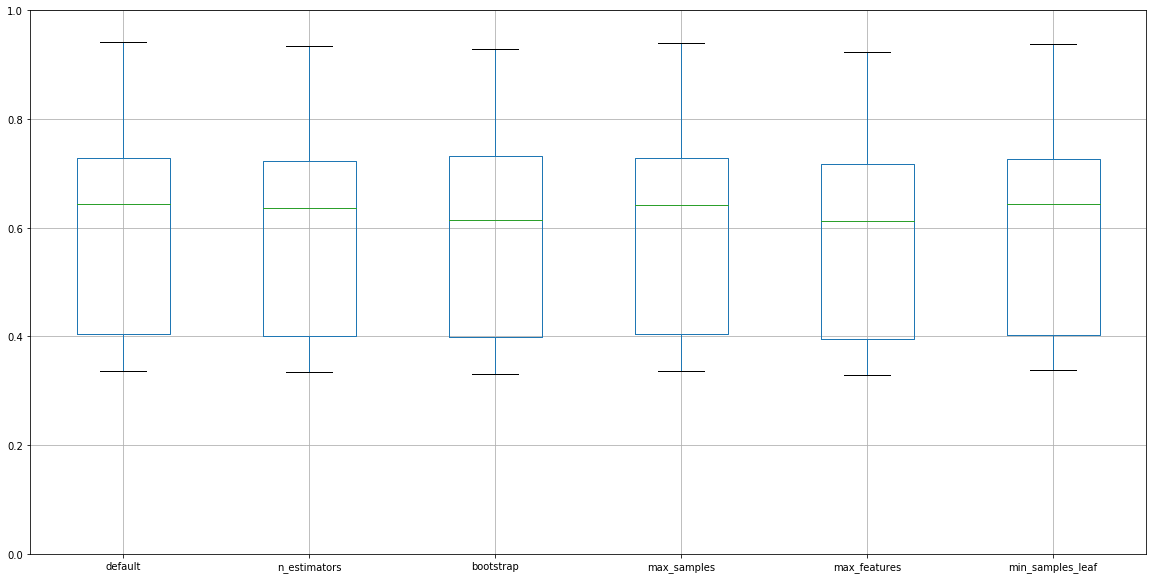

In [123]:
axes = rf_tune_one.boxplot(figsize=(20,10))
axes.set_ylim(0,1)

## - XGBoost

In [80]:
def tune_xgb(param):
    mlist = []
    for i in range(num_datasets):
        bst = xgb.cv(param, dmat_list[i], num_boost_round=n_boost, nfold=3, metrics='rmse', seed=123, shuffle=True)
        mlist.append(bst.iloc[len(bst.index)-1, 2])
    return mlist

In [129]:
xgb_tune_one['default'] = def_result['xgb_rmse']

In [82]:
xgb_tune_one = pd.DataFrame(data=def_result.iloc[:,1].values.ravel(), columns=['default'])
# num_boost_round
target = xgb_num_boost_round
best = target["value"].idxmin()
val = target.iloc[best,:][5]
param = {
    "booster": "gbtree",
    "lambda": 1,
    "alpha": 0,
    "eta": 0.3,
    "subsample": 1,
    "max_depth": 6,
    "min_child_weight": 1,
    "colsample_bytree": 1,
    "colsample_bylevel": 1
}
n_boost = val
xgb_tune_one["num_boost_round"] = tune_xgb(param)

In [132]:
# lambda
target = xgb_lambda
best = target["value"].idxmin()
val = target.iloc[best,:][5]
param = {
    "booster": "gbtree",
    "lambda": val,
    "alpha": 0,
    "eta": 0.3,
    "subsample": 1,
    "max_depth": 6,
    "min_child_weight": 1,
    "colsample_bytree": 1,
    "colsample_bylevel": 1
}
n_boost = 10
xgb_tune_one["lambda"] = tune_xgb(param)

In [85]:
# alpha
target = xgb_alpha
# Best hyperparameter
best = target["value"].idxmin()
val = target.iloc[best,:][5]
param = {
    "booster": "gbtree",
    "lambda": 1,
    "alpha": val,
    "eta": 0.3,
    "subsample": 1,
    "max_depth": 6,
    "min_child_weight": 1,
    "colsample_bytree": 1,
    "colsample_bylevel": 1
}
n_boost = 10
xgb_tune_one["alpha"] = tune_xgb(param)

In [86]:
# eta
target = xgb_eta
best = target["value"].idxmin()
val = target.iloc[best,:][5]
param = {
    "booster": "gbtree",
    "lambda": 1,
    "alpha": 0,
    "eta": val,
    "subsample": 1,
    "max_depth": 6,
    "min_child_weight": 1,
    "colsample_bytree": 1,
    "colsample_bylevel": 1
}
n_boost = 10
xgb_tune_one["eta"] = tune_xgb(param)

In [87]:
# subsample
target = xgb_subsample
best = target["value"].idxmin()
val = target.iloc[best,:][5]
param = {
    "booster": "gbtree",
    "lambda": 1,
    "alpha": 0,
    "eta": 0.3,
    "subsample": val,
    "max_depth": 6,
    "min_child_weight": 1,
    "colsample_bytree": 1,
    "colsample_bylevel": 1
}
n_boost = 10
xgb_tune_one["subsample"] = tune_xgb(param)

In [88]:
# max_depth
target = xgb_max_depth
best = target["value"].idxmin()
val = target.iloc[best,:][5]
param = {
    "booster": "gbtree",
    "lambda": 1,
    "alpha": 0,
    "eta": 0.3,
    "subsample": 1,
    "max_depth": int(val),
    "min_child_weight": 1,
    "colsample_bytree": 1,
    "colsample_bylevel": 1
}
n_boost = 10
xgb_tune_one["max_depth"] = tune_xgb(param)

In [89]:
# min_child_weight
target = xgb_min_child_weight
best = target["value"].idxmin()
val = target.iloc[best,:][5]
param = {
    "booster": "gbtree",
    "lambda": 1,
    "alpha": 0,
    "eta": 0.3,
    "subsample": 1,
    "max_depth": 6,
    "min_child_weight": int(val),
    "colsample_bytree": 1,
    "colsample_bylevel": 1
}
n_boost = 10
xgb_tune_one["min_child_weight"] = tune_xgb(param)

In [90]:
# colsample_bytree
target = xgb_colsample_bytree
best = target["value"].idxmin()
val = target.iloc[best,:][5]
param = {
    "booster": "gbtree",
    "lambda": 1,
    "alpha": 0,
    "eta": 0.3,
    "subsample": 1,
    "max_depth": 6,
    "min_child_weight": 1,
    "colsample_bytree": val,
    "colsample_bylevel": 1
}
n_boost = 10
xgb_tune_one["colsample_bytree"] = tune_xgb(param)

In [91]:
# colsample_bylevel
target = xgb_colsample_bylevel
best = target["value"].idxmin()
val = target.iloc[best,:][5]
param = {
    "booster": "gbtree",
    "lambda": 1,
    "alpha": 0,
    "eta": 0.3,
    "subsample": 1,
    "max_depth": 6,
    "min_child_weight": 1,
    "colsample_bytree": 1,
    "colsample_bylevel": val
}
n_boost = 10
xgb_tune_one["colsample_bylevel"] = tune_xgb(param)

In [119]:
xgb_tune_one

,default,num_boost_round,lambda,alpha,eta,subsample,max_depth,min_child_weight,colsample_bytree,colsample_bylevel
0,0.445107,0.430040,0.473409,0.473043,0.455970,0.472036,0.464503,0.469295,0.471033,0.473575
1,0.733330,0.981058,1.013939,0.992216,0.976953,0.997857,1.003823,0.990195,0.999110,0.997757
2,0.759668,1.279002,1.125388,1.126801,1.122140,1.123314,1.151364,1.103066,1.130890,1.119233
3,0.414424,0.403094,0.415597,0.441580,0.397436,0.421728,0.425346,0.424719,0.420205,0.418641
4,0.969474,0.648134,0.689122,0.724302,0.657846,0.700831,0.708442,0.694454,0.679343,0.688503
5,0.697357,0.540286,0.680779,0.674644,0.657507,0.681280,0.654358,0.683602,0.679576,0.681430
6,22.101774,23.132306,23.671825,22.729399,23.160726,23.209665,22.242375,23.319669,22.317278,23.759221
7,0.743745,0.585058,0.632683,0.639024,0.584449,0.640367,0.631050,0.633649,0.640054,0.632844
8,0.678416,0.641888,0.699898,0.692209,0.675371,0.691265,0.691086,0.702606,0.702813,0.697568
9,0.866240,0.603998,0.681932,0.699953,0.657842,0.680646,0.678664,0.686793,0.683827,0.680355


In [94]:
xgb_tune_one.to_csv("xgb_tune_one.csv", index=False)

In [133]:
print("Mean of rmse:\n", xgb_tune_one.mean(), "\n")
print("Std of rmse: \n", xgb_tune_one.std())

Mean of rmse:
 default              2.156680
num_boost_round      2.124957
lambda               2.185815
alpha                2.130028
eta                  2.139040
subsample            2.156680
max_depth            2.092411
min_child_weight     2.162180
colsample_bytree     2.097001
colsample_bylevel    2.192007
dtype: float64 

Std of rmse: 
 default              5.829545
num_boost_round      5.818048
lambda               5.949087
alpha                5.704328
eta                  5.820737
subsample            5.829545
max_depth            5.580237
min_child_weight     5.858170
colsample_bytree     5.599494
colsample_bylevel    5.971566
dtype: float64


(0, 1.4)

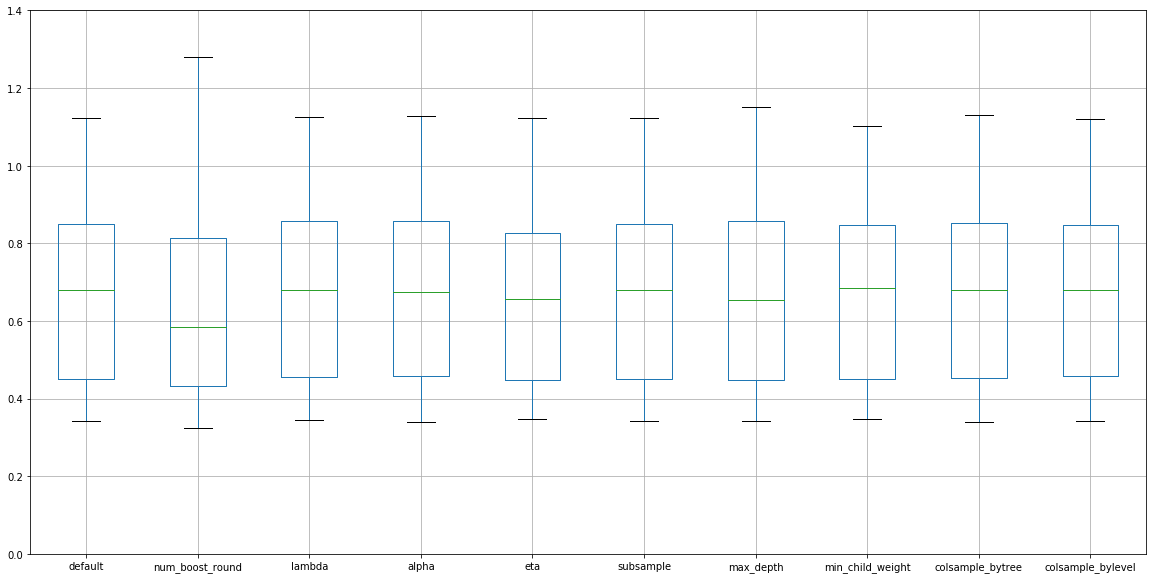

In [131]:
axes = xgb_tune_one.boxplot(figsize=(20,10))
axes.set_ylim(0,1.4)